<a href="https://colab.research.google.com/github/Lanisha20/ECEN-360/blob/main/Dry_Beans_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  Eccentricity  \
0    610.291       208.178117       173.888747      1.197191      0.549812   
1    638.018       200.524796       182.734419      1.097356      0.411785   
2    624.110       212.826130       175.931143      1.209713      0.562727   
3    645.884       210.557999       182.516516      1.153638      0.498616   
4    620.134       201.847882       190.279279      1.060798      0.333680   

   EquivDiameter    Extent  Solidity  roundness  Compactness  ShapeFactor1  \
0     190.141097  0.763923  0.988856   0.958027     0.913358      0.007332   
1     191.272750  0.783968  0.984986   0.887034     0.953861      0.006979   
2     193.410904  0.778113  0.989559   0.947849     0.908774      0.007244   
3     195.467062  0.782681  0.976696   0.903936     0.928329      0.007017   
4     195.896503  0.773098  0.990893   0.984877     0.970516      0.006697   

   ShapeFactor2  ShapeFactor3  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 564419.6250 - val_loss: 55939.7305
Epoch 2/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 40759.2344 - val_loss: 8070.5444
Epoch 3/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4539.2720 - val_loss: 2193.3608
Epoch 4/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1195.8467 - val_loss: 1046.8538
Epoch 5/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 554.0628 - val_loss: 569.7600
Epoch 6/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 329.9582 - val_loss: 346.6321
Epoch 7/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 184.8112 - val_loss: 239.7658
Epoch 8/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 134.7443 - val_loss: 167.0871
Epoch 9/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 98.9839 - val_loss: 126.2711
Epoch 10/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 76.3997 - val_loss: 102.4263
Epoch 11/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 63.6254 - val_loss: 79.5593

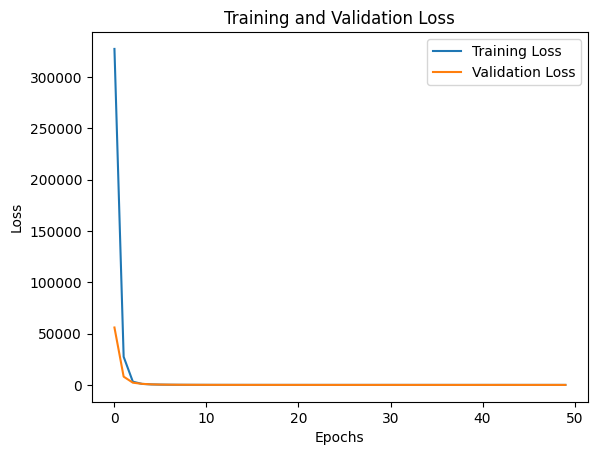

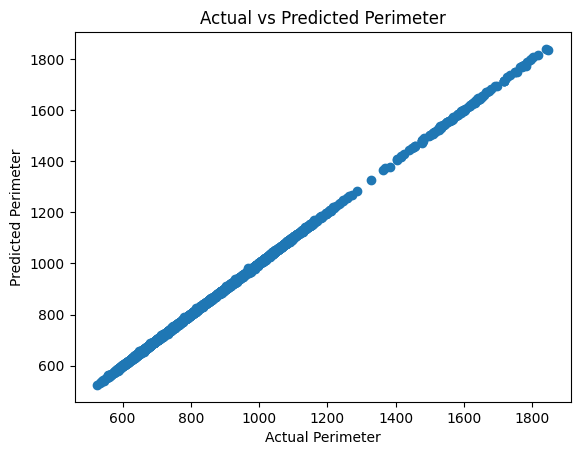

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Dry_Bean_Dataset.csv"
df = pd.read_csv(url)

# Drop irrelevant columns
df.drop(["Area", "ConvexArea", "Class"], axis=1, inplace=True)

# Data Exploration
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display summary statistics
print("\nSummary statistics of numerical columns:")
print(df.describe().T)

# Data Preprocessing
# Split features and target variable (Perimeter)
X = df.drop('Perimeter', axis=1)  # Features
y = df['Perimeter']  # Target (Perimeter)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the deep learning model
model = Sequential()

# Input layer (with input_dim equal to the number of features)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print(f"\nR2 Score: {r2:.4f}")

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Perimeter')
plt.xlabel('Actual Perimeter')
plt.ylabel('Predicted Perimeter')
plt.show()


# Report on Predictive Modeling of Dry Bean Dataset
**Dataset Overview:**

The dataset contains 13,611 dry bean grains, with 16 features describing their shape and dimensions. The objective was to predict the Perimeter using these features, excluding a few.

**Data Exploration:**

After cleaning the data by removing the unneessary columns, I checked the data types, ensuring there were no missing values. The summary statistics revealed key features, such as Major axis length and Minor axis length, which are helpful when predicting Perimeter.

**Model Building:**

I built a deep learning model using Keras with 64 and 32 neurons in the hidden layers. The model was trained with the Adam optimizer and mean squared error loss function which is good for regression. It was trained for 50 epochs.

**Model Evaluation:**

The model achieved an R² score of around 0.99, meaning that the model was able to explain 99% of the variance in the perimeter. This suggests that the model performs well in predicting the perimeter based on the available features. the closer a value is to 1.0 the better the model is performing.

**Key Findings:**

Features like Major axis length, Minor axis length, and Roundness played a significant role in predicting Perimeter. The model performed well with a high R² score and generalization, as seen from the loss curves.

**Conclusion:**

The deep learning model successfully predicted the Perimeter of dry beans. For future work, I might tune the model further or explore other regression techniques to improve the results.






